In [1]:
import pydub 
import numpy as np
import sys
sys.path.insert(0, 'tools/bandcamp-scrapper-neo4j')
import db_transcations as dbt

In [12]:
!pip install upgrade pip

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
You should consider upgrading via the '/Users/tonihurtado/.pyenv/versions/3.8.6/envs/bandcamp-experiment/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
def readmp3(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    segments = y
    if a.channels == 2:
        y = y.reshape((-1, 2))
        samplesxchunk = a.frame_rate*10
        nchunks = int(np.floor(len(y)/(samplesxchunk)))
        
        segments = [y[samplesxchunk*i:samplesxchunk*(i+1)] for i in range(nchunks)]
    if normalized:
        return a.frame_rate, segments.apply(np.float32(it) / 2**15)
    else:
        return a.frame_rate, segments

In [3]:
def writemp3(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [4]:
len(dbt.getAlbumwithParams(["chicago-house"], fans=[], skip=[]))

130

In [5]:
# Load the audio file
AUDIO_FILE = './tools/bandcamp-dl/dl/derek-campbell-as-is/01-aint-no-sunshine.mp3'
sample_rate, samples = readmp3(AUDIO_FILE)

In [9]:
#write samples to audio
for sample in samples:
    writemp3('tests/sample-' + str(sample[0]) + '.mp3',sample_rate,sample)

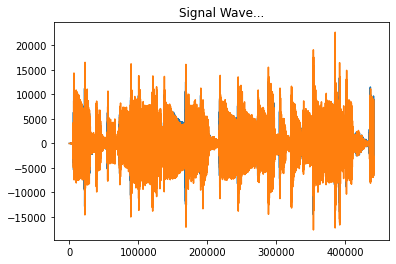

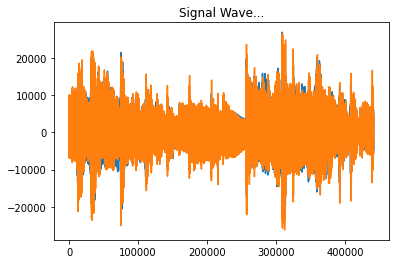

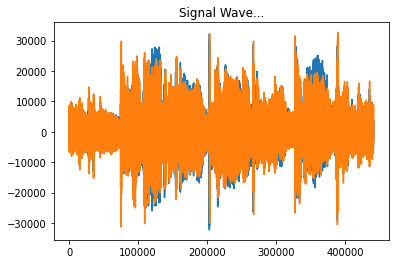

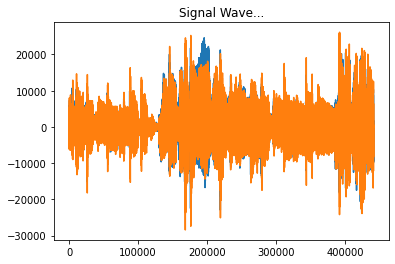

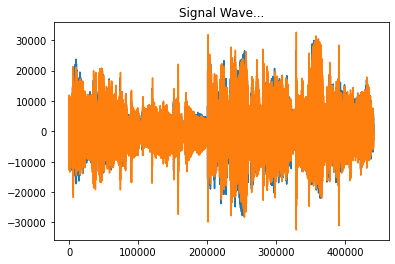

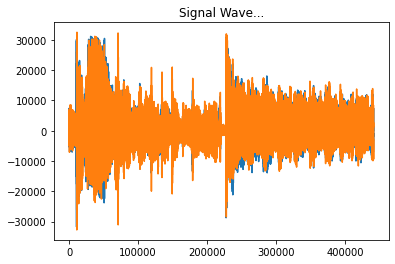

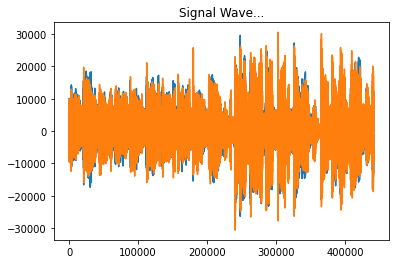

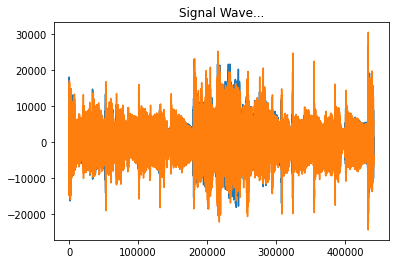

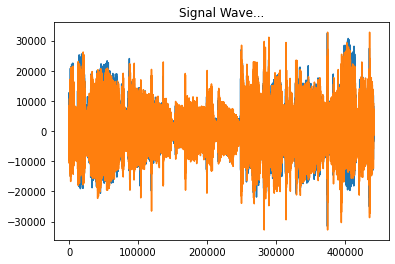

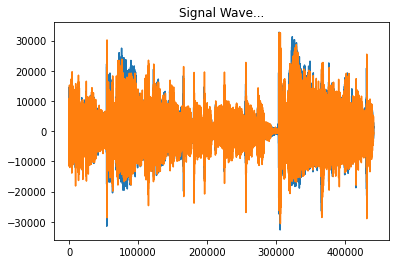

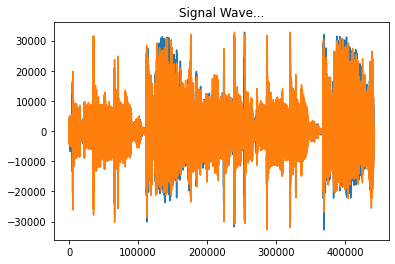

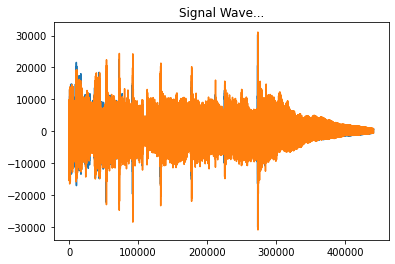

In [7]:
#plot each segment
import matplotlib.pyplot as plt
for sample in samples:
    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(sample)
    plt.show()